# GA

In [32]:
import numpy
import random

# Converting each solution from matrix to vector.
def mat_to_vector(mat_pop_weights):
    pop_weights_vector = []
    for sol_idx in range(mat_pop_weights.shape[0]):
        curr_vector = []
        for layer_idx in range(mat_pop_weights.shape[1]):
            vector_weights = numpy.reshape(mat_pop_weights[sol_idx, layer_idx], newshape=(mat_pop_weights[sol_idx, layer_idx].size))
            curr_vector.extend(vector_weights)
        pop_weights_vector.append(curr_vector)
    return numpy.array(pop_weights_vector)

# Converting each solution from vector to matrix.
def vector_to_mat(vector_pop_weights, mat_pop_weights):
    mat_weights = []
    for sol_idx in range(mat_pop_weights.shape[0]):
        start = 0
        end = 0
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = end + mat_pop_weights[sol_idx, layer_idx].size
            curr_vector = vector_pop_weights[sol_idx, start:end]
            mat_layer_weights = numpy.reshape(curr_vector, newshape=(mat_pop_weights[sol_idx, layer_idx].shape))
            mat_weights.append(mat_layer_weights)
            start = end
    return numpy.reshape(mat_weights, newshape=mat_pop_weights.shape)

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint32(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, mutation_percent):
    num_mutations = numpy.uint32((mutation_percent*offspring_crossover.shape[1])/100)
    mutation_indices = numpy.array(random.sample(range(0, offspring_crossover.shape[1]), num_mutations))
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indices] = offspring_crossover[idx, mutation_indices] + random_value
    return offspring_crossover


# ANN

In [33]:
import numpy

def sigmoid(inpt):
    return 1.0/(1.0+numpy.exp(-1*inpt))

def relu(inpt):
    result = inpt
    result[inpt<0] = 0
    return result

def ann_predict_outputs(weights_mat, data_inputs, data_outputs, activation="relu"):
    predictions = numpy.zeros(shape=(data_inputs.shape[0]))
    for sample_idx in range(data_inputs.shape[0]):
        r1 = data_inputs[sample_idx, :]
        for curr_weights in weights_mat:
            r1 = numpy.matmul(r1, curr_weights)
            if activation == "relu":
                r1 = relu(r1)
            elif activation == "sigmoid":
                r1 = sigmoid(r1)
        predicted_label = numpy.where(r1 == numpy.max(r1))[0][0]
        predictions[sample_idx] = predicted_label
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    accuracy = (correct_predictions/data_outputs.size)*100
    return accuracy, predictions
    
def ann_fitness(weights_mat, data_inputs, data_outputs, activation="relu"):
    accuracy = numpy.empty(shape=(weights_mat.shape[0]))
    for sol_idx in range(weights_mat.shape[0]):
        curr_sol_mat = weights_mat[sol_idx, :]
        accuracy[sol_idx], _ = predict_outputs(curr_sol_mat, data_inputs, data_outputs, activation=activation)
    return accuracy



Generation :  0
Fitness
[24.9745158  25.0764526  24.9745158  24.9745158  10.90723751 24.9745158
 26.60550459 22.06931702]
Parents
[[-0.02959514 -0.02860395 -0.09298911 ...  0.05406793  0.04745522
  -0.08174587]
 [-0.02394379  0.07169892 -0.01962715 ...  0.0217353   0.04282519
  -0.02202442]
 [ 0.02120867 -0.08570143  0.04646607 ...  0.07655826 -0.07921378
   0.0563711 ]
 [ 0.06666964  0.00292993  0.00016202 ... -0.07148594  0.01724685
  -0.0273172 ]]
Crossover
[[-0.02959514 -0.02860395 -0.09298911 ...  0.0217353   0.04282519
  -0.02202442]
 [-0.02394379  0.07169892 -0.01962715 ...  0.07655826 -0.07921378
   0.0563711 ]
 [ 0.02120867 -0.08570143  0.04646607 ... -0.07148594  0.01724685
  -0.0273172 ]
 [ 0.06666964  0.00292993  0.00016202 ...  0.05406793  0.04745522
  -0.08174587]]
Mutation
[[-0.02959514 -0.02860395 -0.09298911 ...  0.0217353   0.04282519
  -0.02202442]
 [-0.02394379  0.07169892 -0.01962715 ...  0.07655826 -0.07921378
   0.0563711 ]
 [ 0.02120867 -0.08570143  0.04646607 .

/Users/jinpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Fitness
[26.60550459 25.0764526  24.9745158  24.9745158  18.96024465 24.9745158
 25.0764526  25.0764526 ]
Parents
[[-0.02959514 -0.02860395 -0.09298911 ...  0.05406793  0.04745522
  -0.08174587]
 [-0.02394379  0.07169892 -0.01962715 ...  0.0217353   0.04282519
  -0.02202442]
 [ 0.02120867 -0.08570143  0.04646607 ... -0.07148594  0.01724685
  -0.0273172 ]
 [ 0.06666964  0.00292993  0.00016202 ...  0.05406793  0.04745522
  -0.08174587]]
Crossover
[[-0.02959514 -0.02860395 -0.09298911 ...  0.0217353   0.04282519
  -0.02202442]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [ 0.02120867 -0.08570143  0.04646607 ...  0.05406793  0.04745522
  -0.08174587]
 [ 0.06666964  0.00292993  0.00016202 ...  0.05406793  0.04745522
  -0.08174587]]
Mutation
[[-0.02959514 -0.02860395 -0.09298911 ...  0.0217353   0.04282519
  -0.02202442]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [ 0.02120867 -0.08570143  0.04646607 ...  0.05406793  

Fitness
[36.49337411 30.93781855 28.18552497 27.93068298 24.8216106  18.70540265
 20.84607543 24.8216106 ]
Parents
[[-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  1.06474791 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]]
Crossover
[[-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  1.06474791 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.02394379  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]]
Mutation
[[ 0.86725063  0.07169892 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [-0.90569239  1.06474791 -0.01962715 ... -0.07148594  0.01724685
  -0.0273172 ]
 [ 0.26612123  0.07169892 -0.01962715 ... -0.07148594 

Fitness
[50.81549439 49.18450561 41.79408767 41.38634047 37.2579001  38.43017329
 41.38634047 24.31192661]
Parents
[[-0.34674194 -0.25109923 -0.01962715 ... -0.07148594 -0.3055513
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.07534493 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.02394379  0.07169892  0.25923418 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.02394379  0.07169892  0.25923418 ... -0.07148594  0.09141006
  -0.0273172 ]]
Crossover
[[-0.34674194 -0.25109923 -0.01962715 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.07534493 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.02394379  0.07169892  0.25923418 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.02394379  0.07169892  0.25923418 ... -0.07148594 -0.3055513
  -0.0273172 ]]
Mutation
[[-0.34674194 -0.25109923  0.87320985 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.98961233 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.02394379  0.07169892  0.78892511 ... -0.07148594  0

Fitness
[53.72069317 50.81549439 49.18450561 48.21610601 37.2579001  51.22324159
 48.01223242 30.32619776]
Parents
[[-0.34674194 -0.25109923  0.13062266 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.01962715 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.01962715 ... -0.07148594 -0.3055513
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.07534493 ... -0.07148594  0.09141006
  -0.0273172 ]]
Crossover
[[-0.34674194 -0.25109923  0.13062266 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.01962715 ... -0.07148594 -0.3055513
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.01962715 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.07534493 ... -0.07148594  0.09141006
  -0.0273172 ]]
Mutation
[[-0.34674194 -0.25109923  0.92426489 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923 -0.55154802 ... -0.07148594 -0.3055513
  -0.0273172 ]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594  0.

Fitness
[58.30784913 57.18654434 54.89296636 54.84199796 19.36799185 27.06422018
 32.87461774 56.72782875]
Parents
[[-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.01579652]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594  0.09141006
  -0.0273172 ]]
Crossover
[[-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.01579652]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.20797163]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594  0.09141006
  -0.0273172 ]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Mutation
[[-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
  -0.98110637]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
  -0.55154107]
 [-0.34674194 -0.25109923  0.04356487 ... -0.07148594 

Fitness
[58.30784913 57.33944954 57.18654434 56.72782875 48.72579001 27.98165138
 36.34046891 58.81753313]
Parents
[[-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.20797163]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.01579652]]
Crossover
[[-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.01579652]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594  0.09141006
   0.20797163]]
Mutation
[[-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.94177813]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   1.09270272]
 [-0.30362821 -0.25109923  0.13062266 ... -0.07148594 

Fitness
[63.0479103  58.86850153 58.81753313 58.30784913 46.53414883 56.47298675
 23.90417941 43.62895005]
Parents
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Crossover
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Mutation
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594 

Fitness
[63.0479103  58.86850153 58.81753313 58.30784913 25.5861366  37.5127421
 58.00203874 25.68807339]
Parents
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Crossover
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Mutation
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  

Fitness
[63.0479103  58.86850153 58.81753313 58.30784913 37.3088685  43.88379205
 44.03669725 39.24566769]
Parents
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Crossover
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1114531  -0.25109923  0.04356487 ... -0.07148594  0.09141006
   0.20797163]]
Mutation
[[-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594 

Fitness
[66.97247706 63.0479103  62.2324159  58.86850153 41.13149847 37.0540265
 44.08766565 51.58002039]
Parents
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.21226275]]
Crossover
[[-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1118307  -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  0.09141006
   0.21226275]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1118307  -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.16403223 ... -0.07148594  

Fitness
[67.43119266 66.97247706 64.27115189 63.0479103  47.50254842 37.6656473
 61.26401631 47.60448522]
Parents
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1118307  -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]]
Crossover
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.1118307  -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ... -0.07148594  

Fitness
[67.43119266 66.97247706 66.81957187 64.93374108 64.01630989 31.85524975
 52.34454638 20.43832824]
Parents
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.21992765 -0.15974111 ...  0.25924929  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.25924929  0.09141006
   0.20797163]
 [-0.55433903 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.55433903 -0.91923115 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -1.21979645 -0.15974111 ...  0.25924929  0.09141006
   0.20797163]
 [-0.55433903 -0.28938024 -0.15974111 ...  0.22807771 

Fitness
[67.43119266 66.97247706 66.81957187 65.34148828 33.94495413 61.51885831
 65.85117227 24.8216106 ]
Parents
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.21992765 -0.15974111 ...  0.25924929  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.25924929  0.09141006
   0.20797163]
 [-0.55433903 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.55433903 -0.25109923 -0.15974111 ...  0.22807771 -0.38786049
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.25924929 -0.55899165
   0.20797163]
 [-0.55433903 -0.21992765 -0.15974111 ...  0.22807771 

Fitness
[68.39959225 67.43119266 67.07441386 66.97247706 41.89602446 42.15086646
 30.63200815 38.37920489]
Parents
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.84225935 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.84225935 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]]
Mutation
[[-1.39165545 -1.03046378 -0.15974111 ...  0.22807771  0.09141006
  -0.6025645 ]
 [ 0.18802633  0.49126613 -0.15974111 ...  0.22807771  0.14596559
   0.95033699]
 [-1.07208793 -0.44975622 -0.15974111 ...  0.22807771 

Fitness
[68.39959225 68.29765545 67.53312946 67.43119266 40.11213048 66.20795107
 67.07441386 24.9745158 ]
Parents
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]]
Mutation
[[-0.58111932 -0.21992765 -0.15974111 ... -0.27383885  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.77922053  0.09141006
   0.20797163]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.68437174 

Fitness
[68.39959225 68.29765545 67.53312946 67.43119266 59.17431193 55.65749235
 45.05606524 52.75229358]
Parents
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.22807771  0.09141006
   0.20797163]
 [-0.55433903 -0.25109923 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]]
Mutation
[[-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.65390538 -0.21992765 -0.23252718 ...  0.22807771 

Fitness
[68.70540265 68.39959225 68.29765545 68.09378186 67.27828746 52.54841998
 43.88379205 45.66768603]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 -0.23432781
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771 -0.26428066
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[68.70540265 68.39959225 68.29765545 68.09378186 40.46890928 25.382263
 18.60346585 64.47502548]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.4162802  -0.25326953 ...  0.22807771  0.14596559
   0.01161908]
 [-0.58111932  0.57638969 -0.15974111 ...  0.22807771  0.09141006
   0.7744604 ]
 [-0.93578777 -0.72901785 -0.25326953 ...  0.22807771  0

Fitness
[68.70540265 68.39959225 68.29765545 68.09378186 53.56778797 26.86034659
 53.87359837 36.74821611]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[71.40672783 68.70540265 68.39959225 68.29765545 67.07441386 52.49745158
 23.29255861 61.41692151]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.14596559
   0.20797163]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.02185694]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771  0.09141006
  -0.02185694]
 [-0.93578777 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.14596559
   0.20797163]
 [-0.58111932 -0.21992765 -0.15974111 ...  0.22807771 

Fitness
[71.40672783 71.35575943 70.13251784 69.21508665 71.10091743 59.53109072
 60.29561672 36.79918451]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.27550314 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.27550314 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771 

Fitness
[71.40672783 71.35575943 71.20285423 71.10091743 41.23343527 44.34250765
 61.00917431 28.54230377]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[71.55963303 71.40672783 71.35575943 71.20285423 63.0988787  35.47400612
 56.11620795 23.19062181]
Parents
[[-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.13157117 -0.18685235 -0.6272527  ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.81523208 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.70257033 ...  0.22807771 

Fitness
[71.66156983 71.55963303 71.40672783 71.35575943 24.9745158  70.03058104
 64.72986748 70.74413863]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[71.66156983 71.55963303 71.40672783 71.35575943 24.9745158  60.95820591
 29.76554536 24.9745158 ]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[71.66156983 71.55963303 71.40672783 71.35575943 59.12334353 25.382263
 24.05708461 23.80224261]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0

Fitness
[72.06931702 72.01834862 71.66156983 71.55963303 24.4648318  59.02140673
 50.1019368  30.42813456]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.06931702 72.01834862 71.66156983 71.55963303 40.67278287 68.50152905
 38.73598369 40.72375127]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765  0.55337454 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -1.19735638 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.75809359 ...  0.22807771 

Fitness
[72.06931702 72.01834862 71.66156983 71.55963303 39.65341488 36.28950051
 61.82466871 20.89704383]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.13157117 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.06931702 72.01834862 71.86544343 71.66156983 58.15494393 67.83893986
 69.46992864 24.872579  ]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771 

Fitness
[72.06931702 72.01834862 71.86544343 71.71253823 71.81447503 57.18654434
 67.38022426 58.46075433]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.29756569  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.29756569  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.29756569 

Fitness
[72.12028542 72.06931702 72.01834862 71.86544343 69.21508665 35.98369011
 37.7166157  34.91335372]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.07592715 -0.18685235 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
  -0.24666547]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.51378524]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.12028542 72.06931702 72.01834862 72.01834862 56.62589195 69.41896024
 47.19673802 42.86442406]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968 

Fitness
[72.12028542 72.06931702 72.01834862 72.01834862 65.44342508 25.94291539
 40.77471967 60.14271152]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968 

Fitness
[72.12028542 72.06931702 72.01834862 72.01834862 50.3058104  24.9745158
 63.86340469 71.45769623]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.19597968  0.05931203
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.99654694 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-2.00189169 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.82720711 -0.21992765 -0.25326953 ...  0.19597968  

Fitness
[72.12028542 72.06931702 72.06931702 72.01834862 64.37308869 33.07849134
 38.83792049 54.02650357]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647e+00  6.85399627e-04 -4.58312233e-02 ...  2.28077710e-01
   9.14100564e-02  2.07971632e-01]
 [-1.16464647e+00 -4.50978373e-01 -4.84320255e-01 ...  2.28077710e-01
   9.14100564e-02  2.07971632e-01]
 [-1.1

Fitness
[72.12028542 72.06931702 72.06931702 72.01834862 28.03261978 53.05810398
 27.21712538 24.9745158 ]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.12028542 72.06931702 72.06931702 72.01834862 35.52497452 69.11314985
 71.76350663 24.36289501]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.53533925 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-0.85140831 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.61420816 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.12028542 72.06931702 72.06931702 72.01834862 42.86442406 68.09378186
 45.97349643 24.9745158 ]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.12028542 72.06931702 72.06931702 72.06931702 39.55147808 34.55657492
 71.25382263 31.75331295]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.2601747  -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.2601747  -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.22222222 72.12028542 72.06931702 72.06931702 25.0254842  71.10091743
 60.14271152 63.91437309]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.93540263 -0.25326953 ...  0.22807771 -0.63723967
   0.20797163]
 [-1.16464647  0.24476132 -0.25326953 ...  0.22807771  0.54292429
   0.20797163]
 [-1.16464647 -0.98112888 -0.25326953 ...  0.22807771 

Fitness
[72.22222222 72.12028542 72.06931702 72.06931702 64.57696228 52.80326198
 27.87971458 53.77166157]
Parents
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-0.38122377 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.75883709 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-2.05273935 -0.21992765 -0.25326953 ...  0.22807771 

Fitness
[72.37512742 72.22222222 72.12028542 72.06931702 51.01936799 72.12028542
 50.509684   35.52497452]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16513634 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16513634 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.71595238 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.34333427]
 [-1.00002975 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.37258836]
 [-0.52108993 -0.20675291 -0.25326953 ...  0.22807771 

Fitness
[72.37512742 72.22222222 72.12028542 72.12028542 48.01223242 37.7675841
 39.60244648 57.08460754]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16513634 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16513634 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647  0.24894391 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647  0.25709128 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647  0.07188137 -0.25326953 ...  0.22807771  

Fitness
[72.73190622 72.37512742 72.27319062 72.27319062 50.4587156  55.86136595
 56.77879715 39.29663609]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.95602572 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
  -0.58340762]
 [-0.70651969 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.66609841]
 [-1.98013438 -0.20675291 -0.25326953 ...  0.22807771  0

Fitness
[72.73190622 72.37512742 72.37512742 72.27319062 50.91743119 48.57288481
 42.71151886 54.94393476]
Parents
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.18442512 -0.20675291 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.54892197 ... -0.06757473  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.26903501 ...  0.21231223  0.1081543
   0.20797163]
 [-1.18442512 -0.20675291  0.41953949 ...  0.90088673  0.

Fitness
[72.88481142 72.73190622 72.62996942 72.57900102 43.17023445 36.03465851
 31.65137615 43.67991845]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.15624627 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.26903501 ...  0.21231223  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.15624627 ...  0.21231223  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.26903501 ...  0.22807771  0.1081543
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.67460832 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.46545993 ...  0.21231223  0.1

Fitness
[72.88481142 72.83384302 72.73190622 72.62996942 24.872579   24.9745158
 24.6687054  32.97655454]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.15624627 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.15624627 ...  0.22807771  0.1081543
   0.20797163]]
Mutation
[[-1.16464647 -0.78121572 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.28548921 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.3849329  -0.25326953 ...  0.22807771  0.

Fitness
[72.88481142 72.83384302 72.83384302 72.73190622 26.50356779 55.04587156
 71.35575943 29.51070336]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0

Fitness
[72.88481142 72.83384302 72.83384302 72.73190622 24.9235474  69.82670744
 54.63812436 32.87461774]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.92377363]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.95021538]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0

Fitness
[72.88481142 72.83384302 72.83384302 72.73190622 52.80326198 31.65137615
 60.29561672 59.93883792]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.25326953 ...  0.22807771  0.1081543
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0

Fitness
[73.13965341 72.88481142 72.88481142 72.83384302 42.66055046 25.2293578
 24.7706422  29.96941896]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
  -0.6676399 ]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.03515811]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.0

Fitness
[73.13965341 72.88481142 72.88481142 72.83384302 32.61977574 72.78287462
 63.20081549 31.44750255]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.

Fitness
[73.13965341 72.88481142 72.88481142 72.83384302 39.19469929 72.68093782
 41.74311927 68.29765545]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09141006
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.49498768 ...  0.22807771 -0.16618636
   0.20797163]
 [-1.16464647 -0.21992765  0.1033934  ...  0.22807771  0.41430107
   0.20797163]
 [-1.16464647 -0.21992765  0.29337863 ...  0.22807771  0

Fitness
[73.13965341 73.08868502 72.88481142 72.88481142 48.67482161 71.50866463
 72.22222222 53.36391437]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.28611715 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771 -0.51125026
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771 -0.62010346
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771 -0.1

Fitness
[73.13965341 73.08868502 73.08868502 73.03771662 49.3883792  52.80326198
 54.43425076 37.7166157 ]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.28424423
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.03256121
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.651

Fitness
[73.13965341 73.08868502 73.08868502 73.03771662 70.64220183 66.25891947
 69.11314985 70.74413863]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.38270094 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.62885891 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.44641637 ...  0.22807771  0.10815

Fitness
[73.13965341 73.08868502 73.08868502 73.03771662 65.34148828 53.46585117
 62.6911315  64.06727829]
Parents
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.22396501 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.21992765 -0.22064703 ... -0.13695992  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ... -0.41847132  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ... -0.23689323  0.10815

Fitness
[73.24159021 73.13965341 73.08868502 73.08868502 33.79204893 38.43017329
 71.30479103 58.61365953]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]
 [-1.16228401 -0.21756519 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.10

Fitness
[73.49643221 73.24159021 73.13965341 73.08868502 56.01427115 71.35575943
 62.6401631  52.70132518]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0

Fitness
[73.49643221 73.24159021 73.13965341 73.08868502 64.32212029 41.69215087
 72.98674822 35.32110092]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.1081543
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.1081543
   0.20797163]
 [-1.16464647 -0.21992765 -0.2091875  ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501  0.52475717 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.06212431 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765  0.49109052 ...  0.22807771  0

Fitness
[73.49643221 73.24159021 73.24159021 73.13965341 48.82772681 47.75739042
 69.26605505 70.28542304]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.21992765 -0.22064703 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.44546381 73.29255861 73.24159021 44.03669725 24.9745158
 24.9745158  62.1304791 ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  

Fitness
[73.49643221 73.44546381 73.29255861 73.24159021 24.9745158  67.07441386
 61.41692151 26.29969419]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647  0.42226143 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.40070315 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.8694809  -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.44546381 73.29255861 73.24159021 71.15188583 61.56982671
 17.83893986 66.81957187]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.44546381 73.29255861 73.24159021 57.49235474 59.12334353
 31.24362895 50.        ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.09980228 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-0.20112372 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.76484003 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.44546381 73.29255861 73.24159021 71.76350663 73.44546381
 69.46992864 38.0224261 ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.44546381 73.44546381 73.29255861 71.71253823 27.16615698
 25.4332314  70.13251784]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.40661958]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.24120894]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.44546381 73.44546381 58.71559633 39.09276249
 24.9745158  72.93577982]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.44546381 73.44546381 56.16717635 65.23955148
 32.31396534 71.76350663]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.44546381 73.44546381 31.90621814 32.82364934
 33.79204893 35.72884811]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.44546381 73.44546381 65.44342508 25.3312946
 45.20897044 37.8185525 ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501  0.12754151 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.5386557  ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.50363979 ...  0.22807771  

Fitness
[73.49643221 73.49643221 73.49643221 73.44546381 37.0030581  62.7420999
 62.7420999  40.41794088]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  

Fitness
[73.49643221 73.49643221 73.49643221 73.44546381 33.74108053 45.41284404
 73.24159021 28.08358818]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.49643221 73.44546381 47.65545362 55.86136595
 63.25178389 57.03363914]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.18486256]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.49643221 73.49643221 72.93577982 73.39449541
 38.0224261  35.57594292]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.49643221 73.49643221 32.46687054 48.31804281
 19.57186544 60.49949032]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ... -0.11329231  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ... -0.7130813   0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.37641837 

Fitness
[73.49643221 73.49643221 73.49643221 73.49643221 63.0988787  31.49847095
 34.19979613 45.05606524]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.49643221 73.49643221 40.01019368 70.13251784
 40.21406728 33.38430173]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.19821818]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501  0.53907872 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.7652965  ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.62615318 ...  0.22807771 

Fitness
[73.49643221 73.49643221 73.49643221 73.49643221 21.45769623 73.54740061
 22.47706422 54.53618756]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647  0.23609996 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -1.09687117 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647  0.7036716  -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 45.20897044 24.7196738
 72.62996942 23.24159021]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 26.70744139 47.85932722
 73.24159021 73.08868502]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.11576424 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.36385708 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.77537729 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 48.47094801 49.5922528
 56.47298675 72.22222222]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-0.57036271 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-0.44110195 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-0.19189901 -0.22396501 -0.17337541 ...  0.22807771  

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 62.7930683  46.48318043
 45.15800204 25.73904179]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 35.01529052 31.95718654
 37.1559633  34.50560652]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
  -0.24010439]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.5688433 ]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 73.03771662 25.99388379
 37.2069317  67.63506626]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 48.36901121 73.24159021
 72.88481142 69.01121305]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 49.28644241 31.44750255
 63.0988787  41.74311927]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.49643221 73.49643221 73.49643221 73.19062181 60.60142712
 26.96228338 62.5891947 ]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771 

Fitness
[73.54740061 73.54740061 73.49643221 73.49643221 54.48521916 24.10805301
 23.75127421 32.56880734]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.54740061 73.54740061 73.49643221 73.49643221 46.89092762 51.07033639
 40.67278287 40.97859327]
Parents
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 73.19062181 73.39449541
 29.15392457 72.98674822]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 36.34046891 41.99796126
 72.27319062 39.50050968]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 68.14475025 61.21304791
 66.76860347 69.11314985]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  1.16883665  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ... -0.55891538  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.24603165 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 29.00101937 73.03771662
 45.71865443 52.08970438]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.28656644  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.12339378  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  1.06520042 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 71.30479103 71.76350663
 69.06218145 25.99388379]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 43.42507645 70.54026504
 62.8950051  71.30479103]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.78307684
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468 -0.79712786
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 45.61671764 45.46381244
 24.9745158  24.9745158 ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501  0.66862418 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.45597391 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.77956807 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 44.39347604 52.65035678
 59.68399592 44.90316004]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 45.25993884 29.96941896
 36.39143731 70.89704383]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.07149837  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.08785995  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ... -0.35780122 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 34.45463812 28.33843017
 44.69928644 36.13659531]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-2.15634459 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-0.92119409 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.06541675 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[73.59836901 73.54740061 73.54740061 73.49643221 60.65239551 37.5127421
 41.89602446 66.00407747]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.77570474
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.89864019
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  

Fitness
[81.39653415 73.59836901 73.54740061 73.54740061 24.9745158  67.78797146
 33.43527013 49.5412844 ]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.13824176 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-0.86352318 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-2.06121524 -0.22396501 -0.17337541 ...  0.22909468 

Fitness
[81.39653415 73.59836901 73.54740061 73.54740061 28.03261978 29.81651376
 31.09072375 49.08256881]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468 

Fitness
[81.39653415 73.59836901 73.54740061 73.54740061 69.06218145 55.04587156
 59.98980632 57.18654434]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22909468  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22909468  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647 -0.22396501 -0.8657969  ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.78815653 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.39875847 ...  0.22909468 

Fitness
[81.39653415 79.35779817 73.59836901 73.54740061 39.29663609 51.17227319
 41.43730887 54.38328236]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[81.39653415 79.35779817 73.59836901 73.54740061 39.19469929 64.62793068
 40.77471967 43.27217125]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.17337541 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.39663716 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.48930106 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.15909775 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[81.39653415 79.35779817 73.59836901 73.54740061 77.16615698 28.44036697
 62.9459735  27.16615698]
Parents
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.35779817 77.16615698 74.10805301 47.65545362
 25.5861366  71.86544343]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.33561301 ...  0.22807771  0.09026064
  -0.63166716]
 [-1.16464647 -0.22396501 -0.61496019 ...  0.22807771  0.09026064
  -0.23909371]
 [-1.16464647 -0.22396501 -0.32803933 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.35779817 79.05198777 62.8440367  76.75840979
 68.39959225 64.93374108]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.31908289 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -1.11291882 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501  0.65179108 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 49.6941896  66.10601427
 53.46585117 44.69928644]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658  0.32368857 ...  0.86061095  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.83873053 ... -0.44275797  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962  0.09815478 ...  0.69632195 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 59.12334353 40.41794088
 43.78185525 43.42507645]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 65.90214067 24.9745158
 37.9204893  35.42303772]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 71.76350663 39.75535168
 41.43730887 66.25891947]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 54.43425076 74.00611621
 73.34352701 77.16615698]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 61.00917431 44.29153925
 73.34352701 58.05300714]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 78.18552497 49.6941896
 41.99796126 67.48216106]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 48.26707441 77.77777778
 38.99082569 70.69317023]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 66.66666667 33.43527013
 34.30173293 63.30275229]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 67.99184506 56.06523955
 69.26605505 46.22833843]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 59.37818552 33.48623853
 27.62487258 62.9459735 ]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 40.36697248 65.64729867
 66.71763507 60.19367992]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.20797163]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
   0.20797163]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.11038304]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -1.02976696]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771 

Fitness
[83.89398573 81.39653415 79.61264016 79.35779817 60.70336391 80.27522936
 65.64729867 31.90621814]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.50009806  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.94035041]
 [-1.82695763 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -1.26720998]
 [-0.49549693 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[83.89398573 81.39653415 80.27522936 79.61264016 55.19877676 60.49949032
 49.7961264  58.81753313]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -1.2530303 ]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
   0.04417907]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771 

Fitness
[83.89398573 81.39653415 80.27522936 79.61264016 76.45259939 32.77268094
 68.70540265 28.44036697]
Parents
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Crossover
[[-1.16464647  0.19978658 -0.30884467 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  0.22807771  0.09026064
  -0.60489882]
 [-1.16464647 -0.42615962 -0.37008946 ...  0.22807771  0.09026064
  -0.60489882]]
Mutation
[[-1.16464647  0.19978658 -0.30884467 ...  0.29728525  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ... -0.68405338  0.09026064
  -0.60489882]
 [-1.16464647 -0.22396501 -0.16789485 ...  1.03498126 

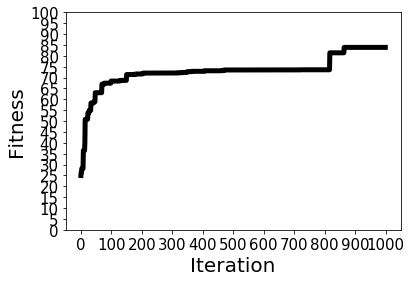

In [35]:
import numpy
#import GA
import pickle
#import ANN
import matplotlib.pyplot

f = open("../data/dataset_features.pkl", "rb")
data_inputs2 = pickle.load(f)
f.close()
features_STDs = numpy.std(a=data_inputs2, axis=0)
data_inputs = data_inputs2[:, features_STDs>50]


f = open("../data/outputs.pkl", "rb")
data_outputs = pickle.load(f)
f.close()

#Genetic algorithm parameters:
#    Mating Pool Size (Number of Parents)
#    Population Size
#    Number of Generations
#    Mutation Percent

sol_per_pop = 8
num_parents_mating = 4
num_generations = 1000
mutation_percent = 10

#Creating the initial population.
initial_pop_weights = []
for curr_sol in numpy.arange(0, sol_per_pop):
    HL1_neurons = 150
    input_HL1_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                             size=(data_inputs.shape[1], HL1_neurons))

    HL2_neurons = 60
    HL1_HL2_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                             size=(HL1_neurons, HL2_neurons))

    output_neurons = 4
    HL2_output_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                              size=(HL2_neurons, output_neurons))

    initial_pop_weights.append(numpy.array([input_HL1_weights, 
                                                HL1_HL2_weights, 
                                                HL2_output_weights]))

pop_weights_mat = numpy.array(initial_pop_weights)
pop_weights_vector = mat_to_vector(pop_weights_mat)

best_outputs = []
accuracies = numpy.empty(shape=(num_generations))

for generation in range(num_generations):
    print("Generation : ", generation)

    # converting the solutions from being vectors to matrices.
    pop_weights_mat = vector_to_mat(pop_weights_vector, 
                                       pop_weights_mat)

    # Measuring the fitness of each chromosome in the population.
    fitness = ann_fitness(pop_weights_mat,data_inputs, data_outputs, activation="sigmoid")


    accuracies[generation] = fitness[0]
    print("Fitness")
    print(fitness)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(pop_weights_vector, 
                                    fitness.copy(), 
                                    num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
    offspring_size=(pop_weights_vector.shape[0]-parents.shape[0], pop_weights_vector.shape[1]))

    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover, mutation_percent=mutation_percent)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    pop_weights_vector[0:parents.shape[0], :] = parents
    pop_weights_vector[parents.shape[0]:, :] = offspring_mutation

pop_weights_mat = vector_to_mat(pop_weights_vector, pop_weights_mat)
best_weights = pop_weights_mat [0, :]
acc, predictions = ann_predict_outputs(best_weights, data_inputs, data_outputs, activation="sigmoid")
print("Accuracy of the best solution is : ", acc)

matplotlib.pyplot.plot(accuracies, linewidth=5, color="black")
matplotlib.pyplot.xlabel("Iteration", fontsize=20)
matplotlib.pyplot.ylabel("Fitness", fontsize=20)
matplotlib.pyplot.xticks(numpy.arange(0, num_generations+1, 100), fontsize=15)
matplotlib.pyplot.yticks(numpy.arange(0, 101, 5), fontsize=15)

f = open("weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
pickle.dump(pop_weights_mat, f)
f.close()